CNN model for ripening classification of banana

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(123)
tf.random.set_seed(123)

In [ ]:
from  tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:

train_datagen=ImageDataGenerator(
    rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True)


test_datagen=ImageDataGenerator(rescale=1./255)
train_generator=train_datagen.flow_from_directory(
'/content/drive/MyDrive/CNN Banana/dataset/train',
target_size=(150,150),
batch_size=32,
class_mode='categorical',
 shuffle=True
 )

validation_generator=test_datagen.flow_from_directory(
'/content/drive/MyDrive/CNN Banana/dataset/val',
target_size=(150,150),
batch_size=32,
class_mode='categorical',shuffle=True
)
test_generator=test_datagen.flow_from_directory(
'/content/drive/MyDrive/CNN Banana/dataset/test',
)

Found 3454 images belonging to 4 classes.
Found 431 images belonging to 4 classes.
Found 435 images belonging to 4 classes.


In [ ]:
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.callbacks import EarlyStopping

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Flatten())

model.add(layers.Dropout(0.2))

model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())

model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())

model.add(layers.Dense(4, activation='softmax'))

# Adjust the learning rate if needed
optimizer = optimizers.Adam(lr=0.002)

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['acc'])



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 148, 148, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 72, 72, 64)        256       
 chNormalization)                                                
                                                        

In [ ]:
# Train the model with early stopping
history = model.fit(
    train_generator,
    steps_per_epoch=15,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=5,
    verbose=1
)

Epoch 1/100
15/15 [==============================] - 7s 451ms/step - loss: 0.4282 - acc: 0.8250 - val_loss: 2.1471 - val_acc: 0.2688
Epoch 2/100
15/15 [==============================] - 5s 305ms/step - loss: 0.3350 - acc: 0.8542 - val_loss: 2.3131 - val_acc: 0.1937
Epoch 3/100
15/15 [==============================] - 6s 437ms/step - loss: 0.3674 - acc: 0.8664 - val_loss: 2.3267 - val_acc: 0.2688
Epoch 4/100
15/15 [==============================] - 5s 307ms/step - loss: 0.2159 - acc: 0.9187 - val_loss: 2.0132 - val_acc: 0.2562
Epoch 5/100
15/15 [==============================] - 5s 360ms/step - loss: 0.2537 - acc: 0.9083 - val_loss: 2.5095 - val_acc: 0.2562
Epoch 6/100
15/15 [==============================] - 6s 369ms/step - loss: 0.2018 - acc: 0.9332 - val_loss: 2.5396 - val_acc: 0.2000
Epoch 7/100
15/15 [==============================] - 5s 307ms/step - loss: 0.1789 - acc: 0.9333 - val_loss: 1.8636 - val_acc: 0.2875
Epoch 8/100
15/15 [==============================] - 6s 420ms/step - 

In [ ]:
# Save the model to an .h5 file in the current directory
model.save('my_model.h5')

# Reload the model from the .h5 file
loaded_model = keras.models.load_model('my_model.h5')

In [ ]:
# Specify the full path to save the model
model_path = '/content/drive/MyDrive/CNN Banana/my_model.h5'

In [ ]:
# Save the model to the specified directory
model.save(model_path)

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load and preprocess the test data
test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/CNN Banana/dataset/test',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Disable shuffling for test data
)

# Make predictions on the test data
test_predictions = model.predict(test_generator)


Found 435 images belonging to 4 classes.
14/14 [==============================] - 6s 383ms/step


In [ ]:
# Get the true labels from the test generator
true_labels = test_generator.classes

In [ ]:
# Convert predicted probabilities to class labels
predicted_labels = np.argmax(test_predictions, axis=1)

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

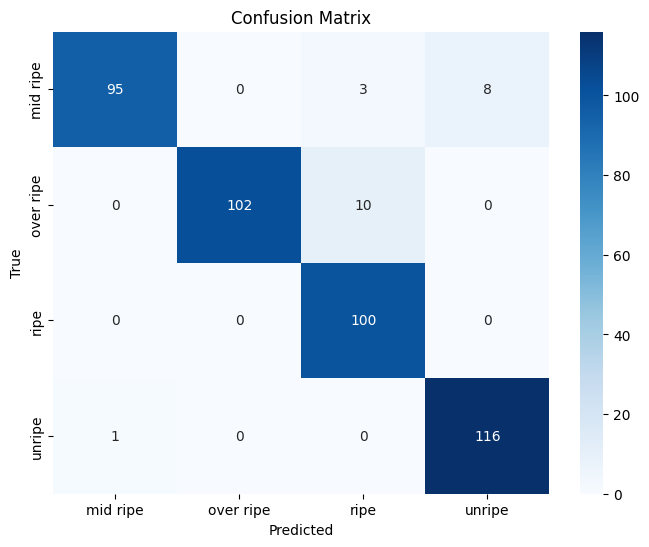

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Print classification report
target_names = list(test_generator.class_indices.keys())
report = classification_report(true_labels, predicted_labels, target_names=target_names)
print(report)

              precision    recall  f1-score   support

    mid ripe       0.99      0.90      0.94       106
   over ripe       1.00      0.91      0.95       112
        ripe       0.88      1.00      0.94       100
      unripe       0.94      0.99      0.96       117

    accuracy                           0.95       435
   macro avg       0.95      0.95      0.95       435
weighted avg       0.95      0.95      0.95       435



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

In [ ]:
# Number of classes
num_classes = 4  # Change this to match your number of classes

# Convert true labels to one-hot encoding
true_labels_one_hot = label_binarize(true_labels, classes=range(num_classes))

In [ ]:
# Calculate predicted probabilities for each class
predicted_probabilities = model.predict(test_generator)

14/14 [==============================] - 5s 328ms/step


In [ ]:

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(true_labels_one_hot[:, i], predicted_probabilities[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


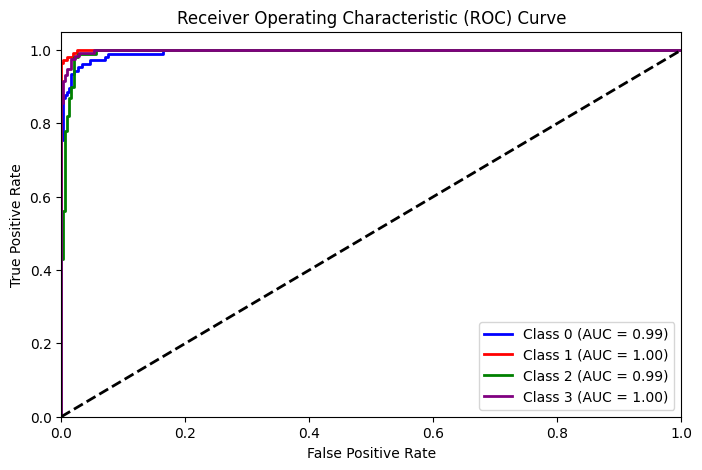

In [ ]:
# Plot ROC curves for each class
plt.figure(figsize=(8, 5))
colors = cycle(['blue', 'red', 'green', 'purple'])  # Change or add more colors as needed

for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()